In [6]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
palette = "Dark2"
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

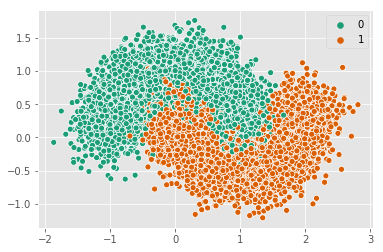

In [7]:
noisy_moons = make_moons(n_samples=10_000, noise=.25, random_state=42)

sns.scatterplot(x=noisy_moons[0][:, 0],
                y=noisy_moons[0][:, 1],
                hue=noisy_moons[1],
                palette=palette)

# Load and split the data
X_train, X_test, y_train, y_test = train_test_split(noisy_moons[0], noisy_moons[1], test_size=0.3, random_state=42)

In [8]:
rf_moon = RandomForestClassifier(random_state=42)
rf_moon.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [8]:
from modeleval import *

In [143]:
eva = BinaryEvaluator()

Evaluation result of Threshold==0.6
---Common Metrics---
The accuracy is 0.9333
The recall for 1 is 0.9213
The precision for 1 is 0.9406
The recall for 0 is 0.9448
The precision for 0 is 0.9267
The F1-score is 0.9308
The ROC-AUC is 0.9721

---Confusion Matrics---
Predicted     0     1   All
True                       
0          1454    85  1539
1           115  1346  1461
All        1569  1431  3000


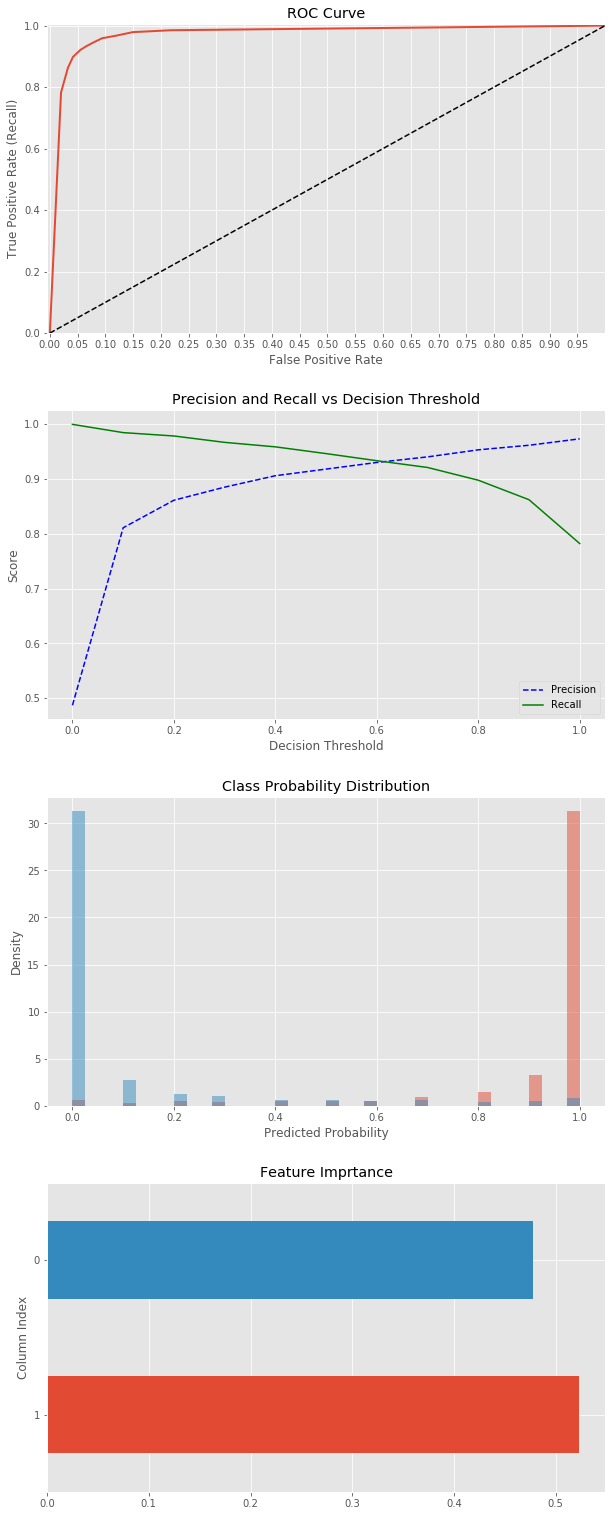

In [144]:
eva.evaluate(rf_moon, X_test, y_test, threshold=0.6, save=True, save_folder= "result/" )